In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
germany = pd.read_csv('data/autoscout_data.csv', index_col=0)
poland = pd.read_csv('data/otomoto_data.csv')

In [3]:
germany['year'] = pd.to_numeric(germany['year'], errors='coerce')
germany['price_in_euro'] = pd.to_numeric(germany['price_in_euro'], errors='coerce')
germany['mileage_in_km'] = pd.to_numeric(germany['mileage_in_km'], errors='coerce')

poland['year'] = pd.to_numeric(poland['year'], errors='coerce')
poland['mileage'] = poland['mileage'].str.replace(' km', '').str.replace(' ', '')
poland['mileage'] = pd.to_numeric(poland['mileage'], errors='coerce')

In [4]:
germany.dropna(inplace=True)
germany.isna().sum()

brand                       0
model                       0
color                       0
registration_date           0
year                        0
price_in_euro               0
power_kw                    0
power_ps                    0
transmission_type           0
fuel_type                   0
fuel_consumption_l_100km    0
fuel_consumption_g_km       0
mileage_in_km               0
offer_description           0
dtype: int64

In [5]:
poland.dropna(inplace=True)
poland.isna().sum()

brand              0
model              0
price_in_pln       0
mileage            0
gearbox            0
engine_capacity    0
fuel_type          0
city               0
voivodeship        0
year               0
dtype: int64

In [6]:
print(germany.columns) 
print(poland.columns)

Index(['brand', 'model', 'color', 'registration_date', 'year', 'price_in_euro',
       'power_kw', 'power_ps', 'transmission_type', 'fuel_type',
       'fuel_consumption_l_100km', 'fuel_consumption_g_km', 'mileage_in_km',
       'offer_description'],
      dtype='object')
Index(['brand', 'model', 'price_in_pln', 'mileage', 'gearbox',
       'engine_capacity', 'fuel_type', 'city', 'voivodeship', 'year'],
      dtype='object')


In [7]:
#germany = germany.loc[germany.year <= 2015]
#poland = poland.loc[poland.year <= 2015]
#print(poland.describe())
#print(germany.describe())

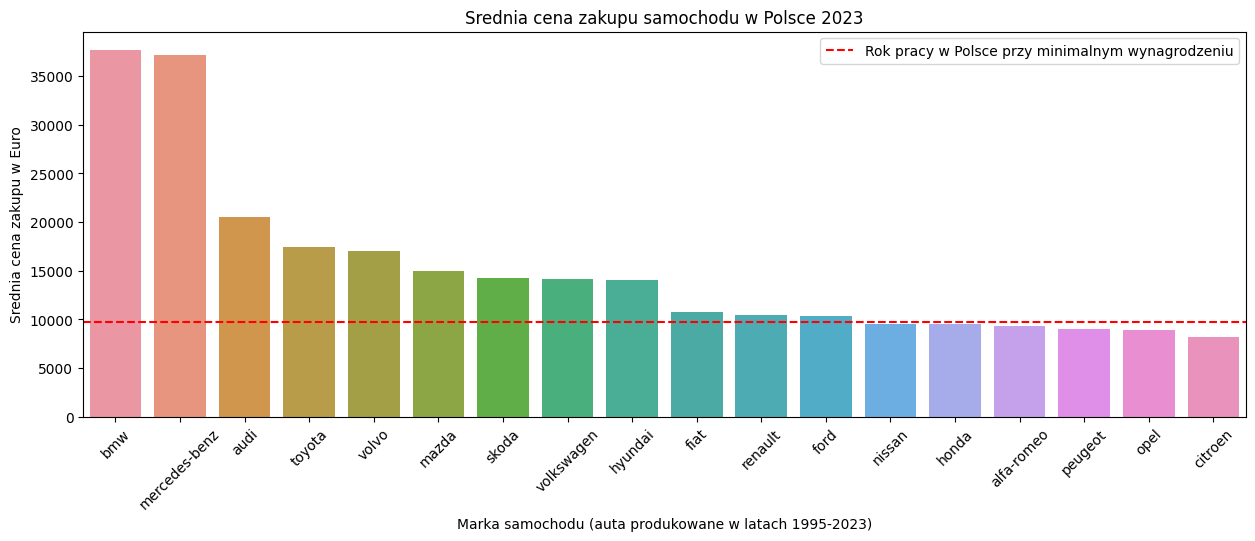

In [8]:
pl_by_brand = poland.groupby(by=['brand'])['price_in_pln'].mean().to_frame().reset_index()
pl_by_brand['price_in_euro'] = pl_by_brand['price_in_pln']//4.44
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.axhline(12*810.79, color='r', linestyle='dashed', label='Rok pracy w Polsce przy minimalnym wynagrodzeniu')
plt.title('Srednia cena zakupu samochodu w Polsce 2023')
plt.legend()

brands = ['alfa-romeo', 'volkswagen', 'bmw', 'citroen', 'fiat', 'ford', 
          'honda', 'hyundai', 'mazda', 'mercedes-benz', 'toyota', 'volvo', 
          'skoda', 'renault', 'peugeot', 'opel', 'nissan', 'audi']
pl_by_brand.sort_values(by=['price_in_euro'], inplace=True, ascending=False)
ax = sns.barplot(data=pl_by_brand.loc[pl_by_brand.brand.isin(brands)], x='brand', y='price_in_euro')
ax.set(xlabel='Marka samochodu (auta produkowane w latach 1995-2023)', ylabel='Srednia cena zakupu w Euro')
plt.show()

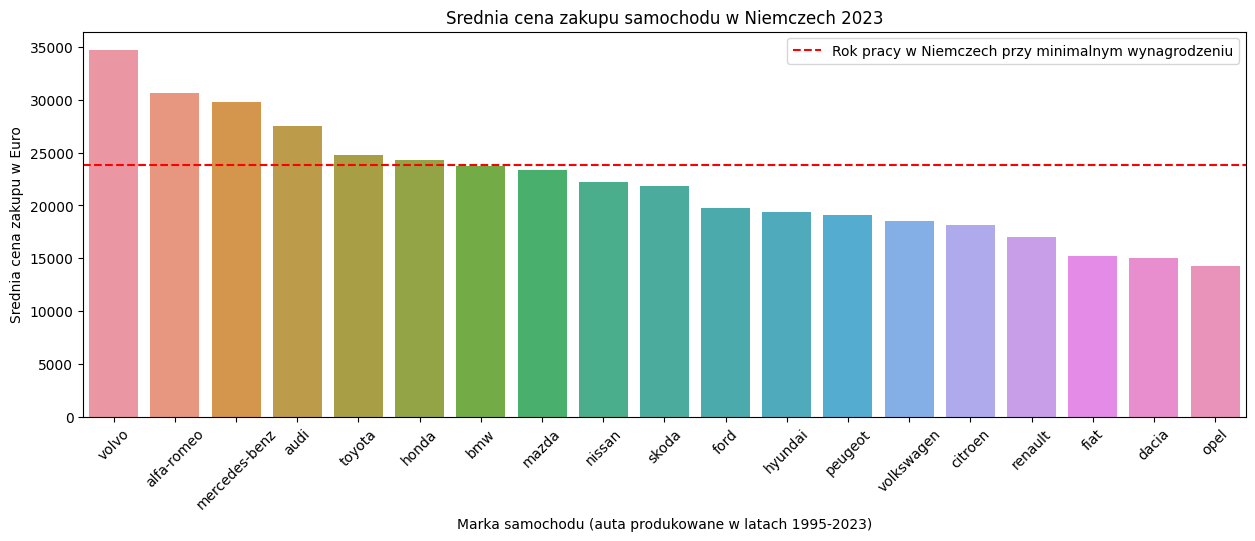

In [9]:
de_by_brand = germany.groupby(by=['brand'])['price_in_euro'].mean().to_frame().reset_index()
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.axhline(12*1987 , color='r', linestyle='dashed', label='Rok pracy w Niemczech przy minimalnym wynagrodzeniu')
plt.title('Srednia cena zakupu samochodu w Niemczech 2023')
plt.legend()

brands = ['alfa-romeo', 'volkswagen', 'bmw', 'citroen', 'dacia', 'fiat', 'ford', 
          'honda', 'hyundai', 'mazda', 'mercedes-benz', 'toyota', 'volvo', 
          'skoda', 'renault', 'peugeot', 'opel', 'nissan', 'audi']
de_by_brand.sort_values(by=['price_in_euro'], inplace=True, ascending=False)
ax = sns.barplot(data=de_by_brand.loc[de_by_brand.brand.isin(brands)], x='brand', y='price_in_euro')
ax.set(xlabel='Marka samochodu (auta produkowane w latach 1995-2023)', ylabel='Srednia cena zakupu w Euro')
plt.show()

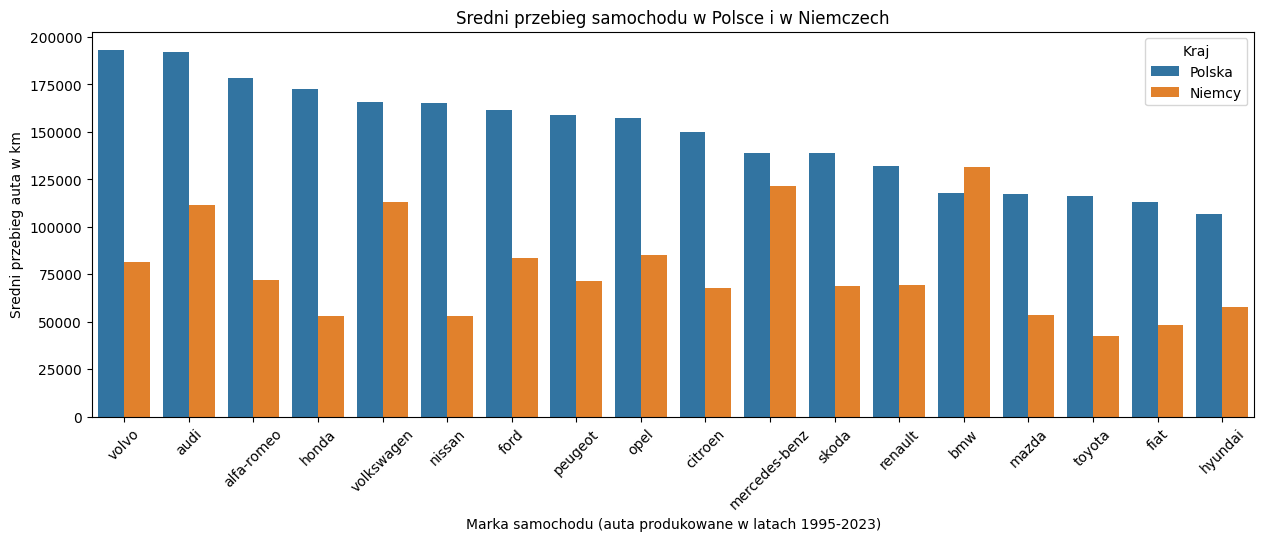

In [10]:
germany.rename(columns={'mileage_in_km': 'mileage'}, inplace=True)
germany['country'] = 'Niemcy'
poland['country'] = 'Polska'
combined = pd.concat([poland[['brand', 'mileage', 'country']], germany[['brand', 'mileage', 'country']]], ignore_index=True)

by_mileage = combined.groupby(by=['brand', 'country'])['mileage'].mean().to_frame().reset_index()
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.title('Sredni przebieg samochodu w Polsce i w Niemczech')

brands = ['alfa-romeo', 'volkswagen', 'bmw', 'citroen', 'fiat', 'ford', 
          'honda', 'hyundai', 'mazda', 'mercedes-benz', 'toyota', 'volvo', 
          'skoda', 'renault', 'peugeot', 'opel', 'nissan', 'audi']

by_mileage.sort_values(by=['mileage'], inplace=True, ascending=False)
ax = sns.barplot(data=by_mileage.loc[by_mileage.brand.isin(brands)], x='brand', y='mileage', hue='country')
ax.set(xlabel='Marka samochodu (auta produkowane w latach 1995-2023)', ylabel='Sredni przebieg auta w km')
plt.legend(title='Kraj')
plt.show()

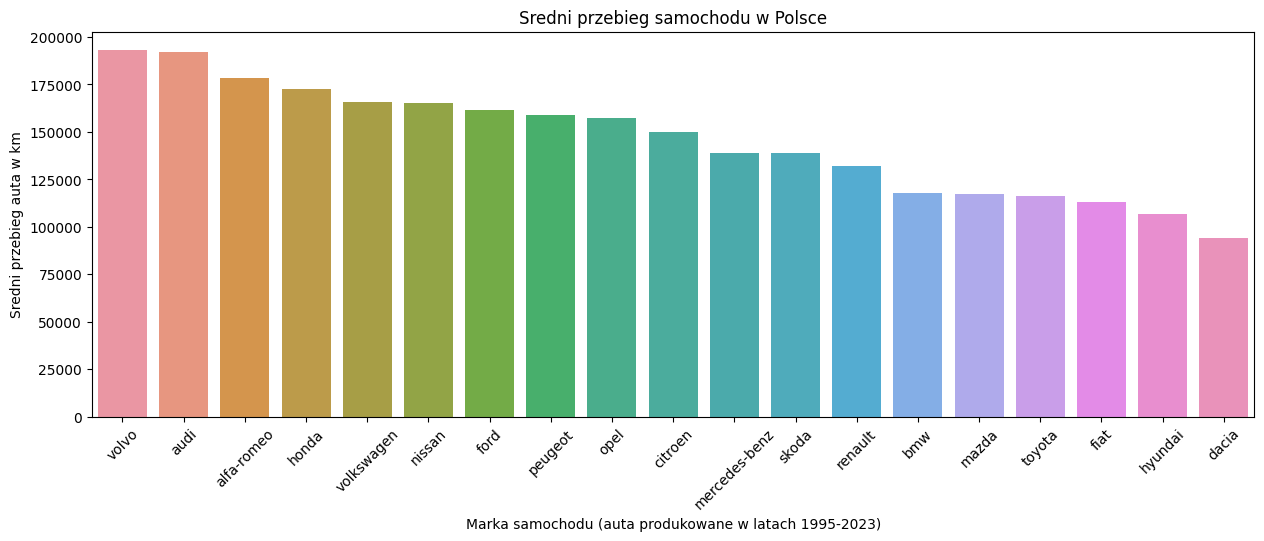

In [11]:
pl_by_mileage = poland.groupby(by=['brand'])['mileage'].mean().to_frame().reset_index()
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.title('Sredni przebieg samochodu w Polsce')
brands = ['alfa-romeo', 'volkswagen', 'bmw', 'citroen', 'dacia', 'fiat', 'ford', 
          'honda', 'hyundai', 'mazda', 'mercedes-benz', 'toyota', 'volvo', 
          'skoda', 'renault', 'peugeot', 'opel', 'nissan', 'audi']

pl_by_mileage.sort_values(by=['mileage'], inplace=True, ascending=False)
ax = sns.barplot(data=pl_by_mileage.loc[pl_by_mileage.brand.isin(brands)], x='brand', y='mileage')
ax.set(xlabel='Marka samochodu (auta produkowane w latach 1995-2023)', ylabel='Sredni przebieg auta w km')
plt.show()

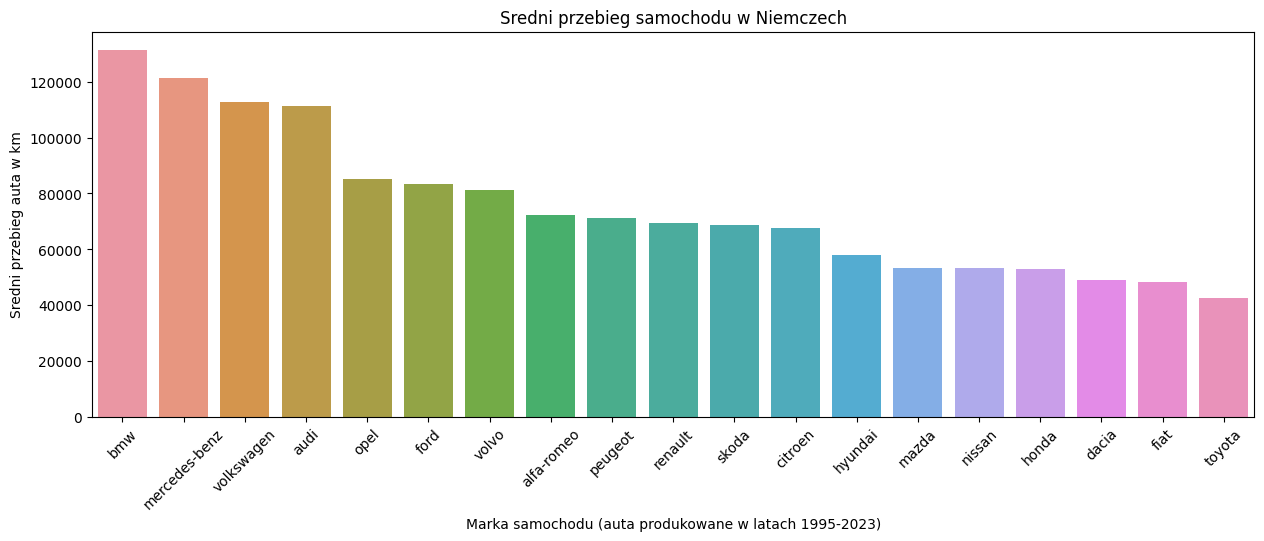

In [12]:
de_by_mileage = germany.groupby(by=['brand'])['mileage'].mean().to_frame().reset_index()
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.title('Sredni przebieg samochodu w Niemczech')
brands = ['alfa-romeo', 'volkswagen', 'bmw', 'citroen', 'dacia', 'fiat', 'ford', 
          'honda', 'hyundai', 'mazda', 'mercedes-benz', 'toyota', 'volvo', 
          'skoda', 'renault', 'peugeot', 'opel', 'nissan', 'audi']

de_by_mileage.sort_values(by=['mileage'], inplace=True, ascending=False)
ax = sns.barplot(data=de_by_mileage.loc[de_by_mileage.brand.isin(brands)], x='brand', y='mileage')
ax.set(xlabel='Marka samochodu (auta produkowane w latach 1995-2023)', ylabel='Sredni przebieg auta w km')
plt.show()

[Text(0.5, 0, 'Marka samochodu (auta produkowane w latach 1995-2023)'),
 Text(0, 0.5, 'Liczba')]

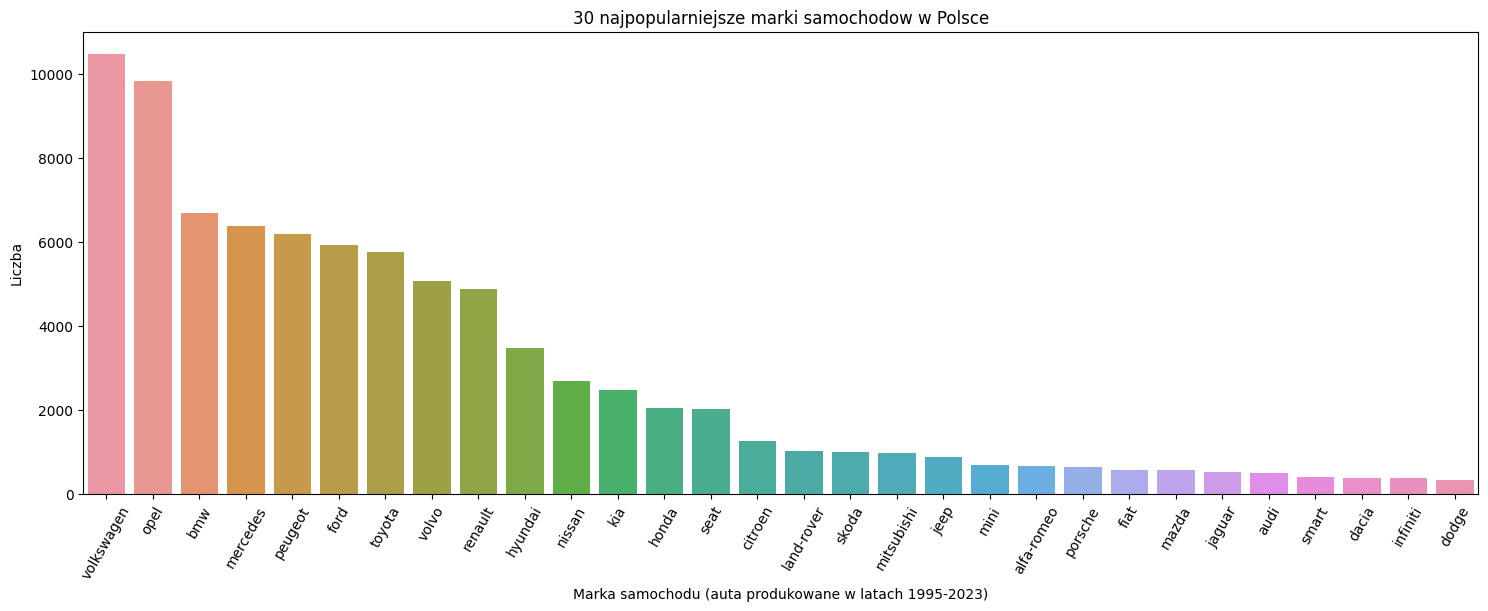

In [13]:
poland['brand'] = poland['brand'].replace('mercedes-benz','mercedes')
pl_category_counts = poland['brand'].value_counts().head(30)

plt.figure(figsize=(18, 6))
plt.title('30 najpopularniejsze marki samochodow w Polsce')
plt.xticks(rotation=60) 
ax = sns.barplot(x=pl_category_counts.index, y=pl_category_counts.values)
ax.set(xlabel='Marka samochodu (auta produkowane w latach 1995-2023)', ylabel='Liczba')

[Text(0.5, 0, 'Marka samochodu (auta produkowane w latach 1995-2023)'),
 Text(0, 0.5, 'Liczba')]

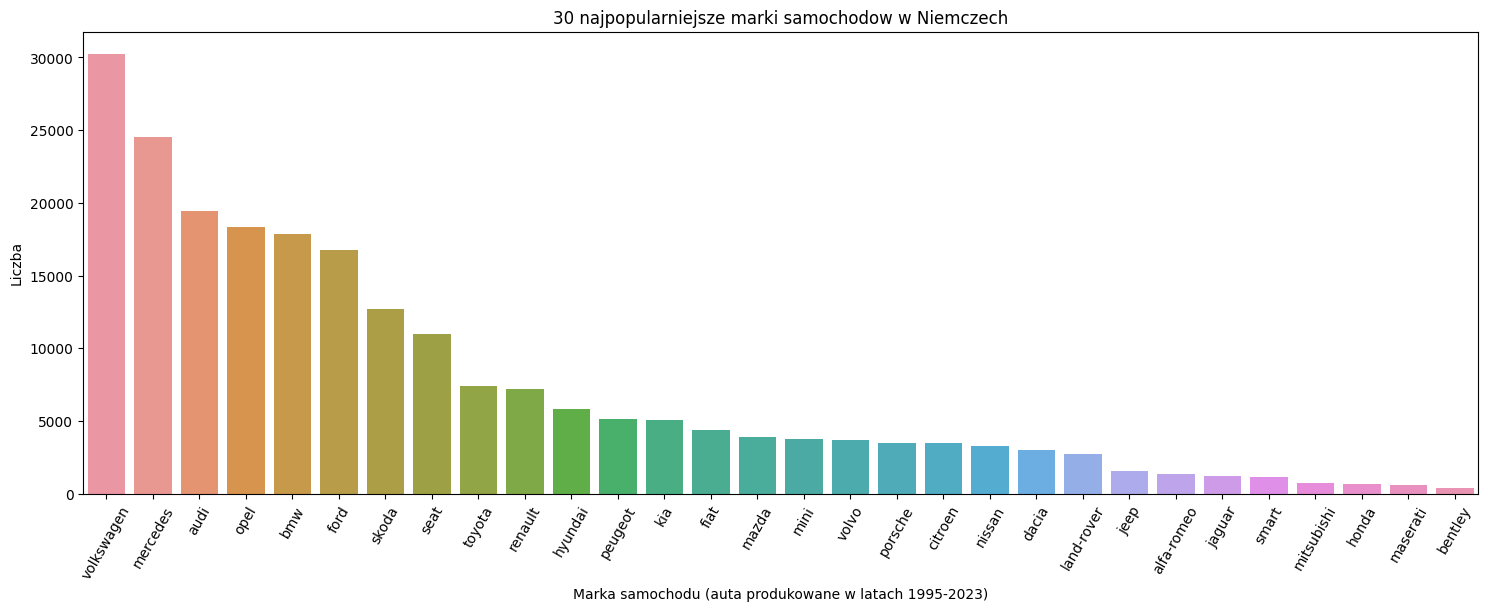

In [14]:
germany['brand'] = germany['brand'].replace('mercedes-benz','mercedes')
de_category_counts = germany['brand'].value_counts().head(30)

plt.figure(figsize=(18, 6))
plt.title('30 najpopularniejsze marki samochodow w Niemczech')
plt.xticks(rotation=60) 
ax = sns.barplot(x=de_category_counts.index, y=de_category_counts.values)
ax.set(xlabel='Marka samochodu (auta produkowane w latach 1995-2023)', ylabel='Liczba')

[Text(0, 0.5, 'Liczba ofert'), Text(0.5, 0, '')]

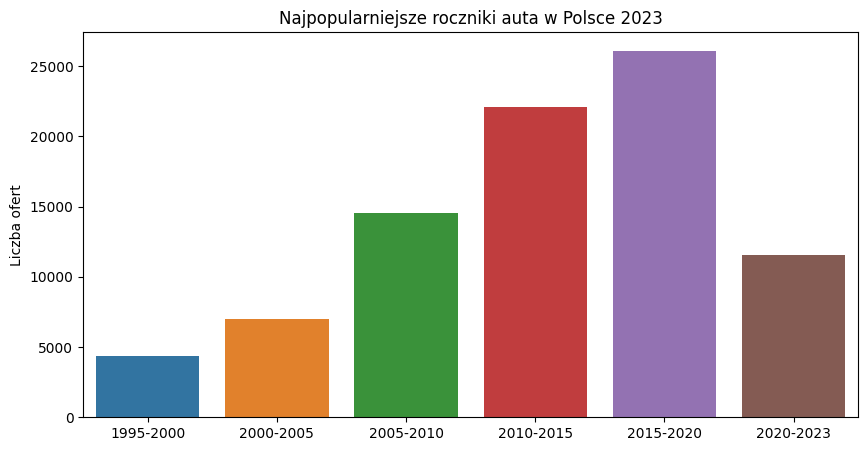

In [15]:
bins = [1995, 2000, 2005, 2010, 2015, 2020, 2023]
labels = ['1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2020', '2020-2023']
by_year = pd.cut(poland['year'], bins, labels=labels).value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 5))
plt.title('Najpopularniejsze roczniki auta w Polsce 2023')
ax = sns.barplot(data=by_year, x='year', y='count')
ax.set(ylabel='Liczba ofert', xlabel='')

[Text(0, 0.5, 'Liczba ofert'), Text(0.5, 0, '')]

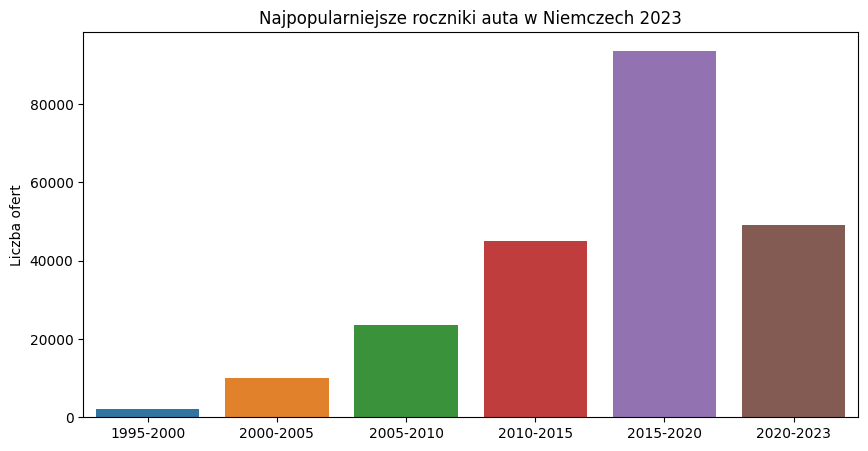

In [16]:
bins = [1995, 2000, 2005, 2010, 2015, 2020, 2023]
labels = ['1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2020', '2020-2023']
de_by_year = pd.cut(germany['year'], bins, labels=labels).value_counts().to_frame().reset_index()

plt.figure(figsize=(10, 5))
plt.title('Najpopularniejsze roczniki auta w Niemczech 2023')
ax = sns.barplot(data=de_by_year, x='year', y='count')
ax.set(ylabel='Liczba ofert', xlabel='')

[Text(0, 0, '43077'),
 Text(0, 0, '35603'),
 Text(0, 0, '4066'),
 Text(0, 0, '2893'),
 Text(0, 0, '24'),
 Text(0, 0, '14')]

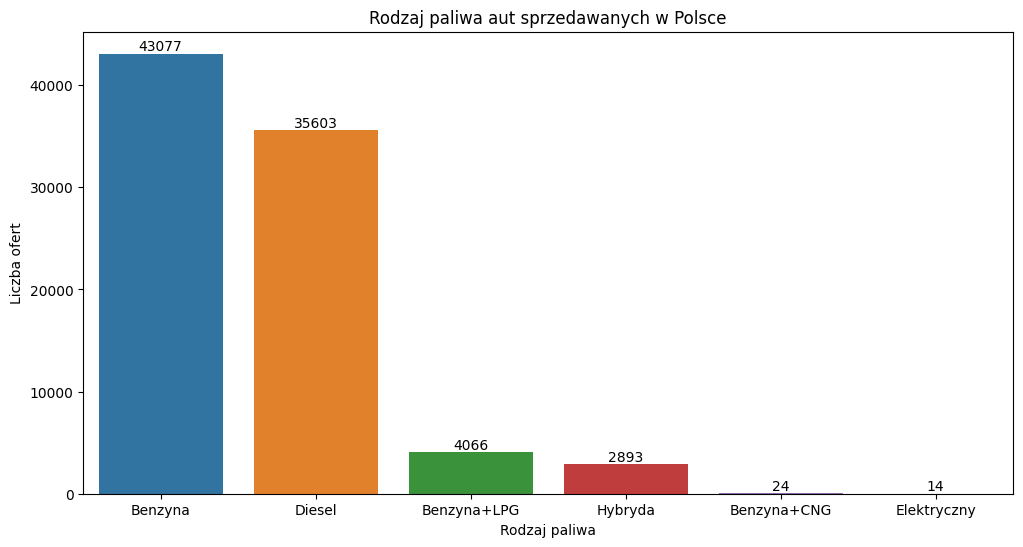

In [17]:
fuel_types = ['Benzyna', 'Diesel', 'Benzyna+LPG', 'Hybryda', 'Benzyna+CNG', 'Elektryczny']
poland = poland.loc[poland.fuel_type.isin(fuel_types)]
pl_category_counts = poland['fuel_type'].value_counts()

plt.figure(figsize=(12, 6))
plt.title('Rodzaj paliwa aut sprzedawanych w Polsce')
ax = sns.barplot(x=pl_category_counts.index, y=pl_category_counts.values, errwidth=0)
ax.set(xlabel='Rodzaj paliwa', ylabel='Liczba ofert')
ax.bar_label(ax.containers[0], fmt='%.1i')

[Text(0, 0, '132026'),
 Text(0, 0, '78928'),
 Text(0, 0, '10312'),
 Text(0, 0, '1054'),
 Text(0, 0, '471'),
 Text(0, 0, '414'),
 Text(0, 0, '375'),
 Text(0, 0, '38'),
 Text(0, 0, '5')]

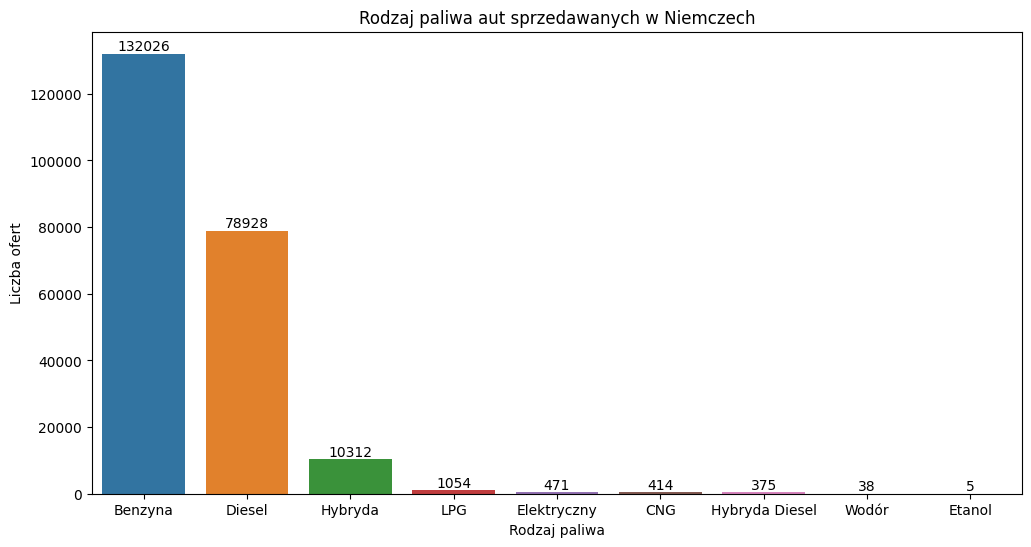

In [18]:
germany = germany.loc[(germany.fuel_type != 'Unknown') & (germany.fuel_type != 'Other')]
# Mapping dictionary for replacement
mapping_dict = {
    'Petrol': 'Benzyna',
    'Diesel': 'Diesel',
    'Hybrid': 'Hybryda',
    'LPG': 'LPG',
    'CNG': 'CNG',
    'Diesel Hybrid': 'Hybryda Diesel',
    'Electric': 'Elektryczny',
    'Ethanol': 'Etanol',
    'Hydrogen': 'Wodór'
}

# Replace the values using the mapping dictionary
germany['fuel_type'] = germany['fuel_type'].replace(mapping_dict)

de_fuel_types = germany['fuel_type'].value_counts()

plt.figure(figsize=(12, 6))
plt.title('Rodzaj paliwa aut sprzedawanych w Niemczech')
ax = sns.barplot(x=de_fuel_types.index, y=de_fuel_types.values)
ax.set(xlabel='Rodzaj paliwa', ylabel='Liczba ofert')
ax.bar_label(ax.containers[0], fmt='%.1i')